In [25]:
from orbitflows import HamiltonianMappingModel, generate_sho_orbits
import matplotlib.pyplot as plt
import numpy as np
import torch
from orbitflows import H, H_sho, actionAngleHarmonic, actionAngleHarmonicInverse
from orbitflows.integrate import eulerstep, rungekutta4
from time import time
from functools import partial
from tqdm import tqdm

Test case to check if RK4 does better than euler step, but this time implemented within the existing framework

In [26]:
n_actions = 1
n_angles = 100
r_min = 0.5
r_max = 1.5
omega_guess = 1
omega_correct = 1.5
ps_guess, aa_guess = generate_sho_orbits(n_actions, omega=omega_guess, t_end=10, n_steps=n_angles, r_bounds=[r_min*1.0,r_max*1.0]) 
correct_ps, correct_aa = generate_sho_orbits(n_actions, omega=omega_correct, t_end=10, n_steps=n_angles, r_bounds=[r_min,r_max])

In [27]:
def sho_potential(x, omega=omega_correct):
    return 0.5*(omega*x)**2

In [28]:
HamiltonianMappingModel(targetPotential=sho_potential, input_dim=2, hidden_dim=128, num_layers=64)

In [29]:
model = HamiltonianMappingModel(targetPotential=sho_potential, input_dim=2, hidden_dim=128, num_layers=64)
model.train(ps_guess, 0) # try to make it not train at all

0it [00:00, ?it/s]


In [30]:
model.flow(ps_guess) - ps_guess

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0.

In [ ]:
aa_euler = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True).to(torch.float64), 100, 10, correction = eulerstep)
aa_rk4 = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True).to(torch.float64), 100, 10, correction = rungekutta4)

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_49270/2491942190.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aa_euler = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = eulerstep)



100%|██████████| 100/100 [00:06<00:00, 16.13it/s]


/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_49270/2491942190.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  aa_rk4 = model.integrate(torch.tensor(aa_guess[0][0], requires_grad=True), 100, 10, correction = rungekutta4)



100%|██████████| 100/100 [00:20<00:00,  4.91it/s]


In [42]:
ps_out_euler = model.aa_to_ps(aa_euler)
ps_out_rk4 = model.aa_to_ps(aa_rk4)

In [43]:
ps_out_euler - ps_out_rk4

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.000

Text(0, 0.5, 'p')

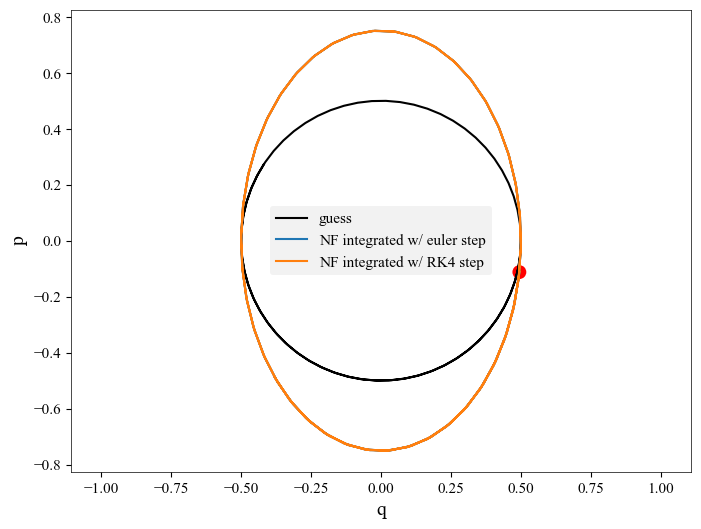

In [34]:
#plt.plot(correct_ps[0][..., 0], correct_ps[0][..., 1], label='galpy actionAngleHarmonic')
plt.plot(ps_guess[0][..., 0], ps_guess[0][..., 1], label='guess')
plt.plot(ps_out_euler[..., 0].detach(), ps_out_euler[..., 1].detach(), label='NF integrated w/ euler step')
plt.plot(ps_out_rk4[..., 0].detach(), ps_out_rk4[..., 1].detach(), label='NF integrated w/ RK4 step')
plt.scatter(ps_out_euler[..., 0].detach()[0], ps_out_euler[..., 1].detach()[0], s=100, c='red')
plt.legend()
plt.axis('equal')
plt.xlabel('q', fontsize=14)
plt.ylabel('p', fontsize=14)

In [35]:
# plt.plot(aa_euler.detach()[:,1])
# plt.plot(aa_rk4.detach()[:,1])


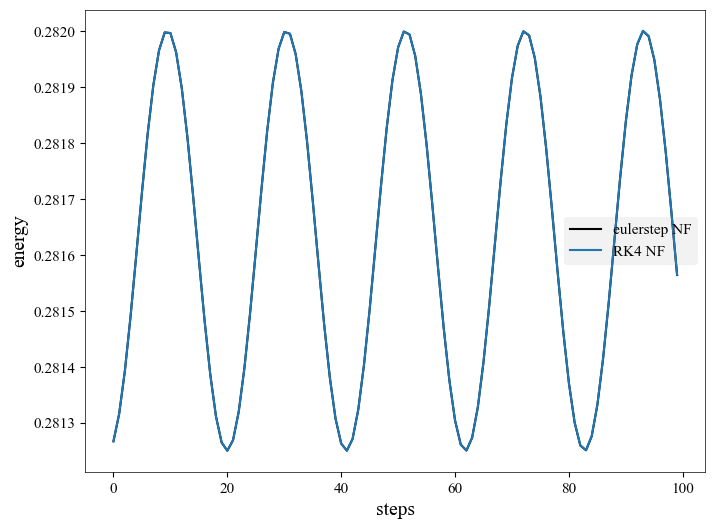

In [36]:
plt.plot(H_sho(ps_out_euler, omega=omega_correct).detach(), label='eulerstep NF')
plt.plot(H_sho(ps_out_rk4, omega=omega_correct).detach(), label='RK4 NF')
#plt.plot(H_sho(prediction[0], omega=omega_correct).detach(), label='guess')
#plt.plot(H_sho(correct_ps[0], omega=omega_correct).detach(), label='galpy integrated')
plt.xlabel('steps', fontsize=14)
plt.ylabel('energy', fontsize=14)
plt.legend()

Text(0, 0.5, 'H$_{euler}$ - H$_{RK4}$')

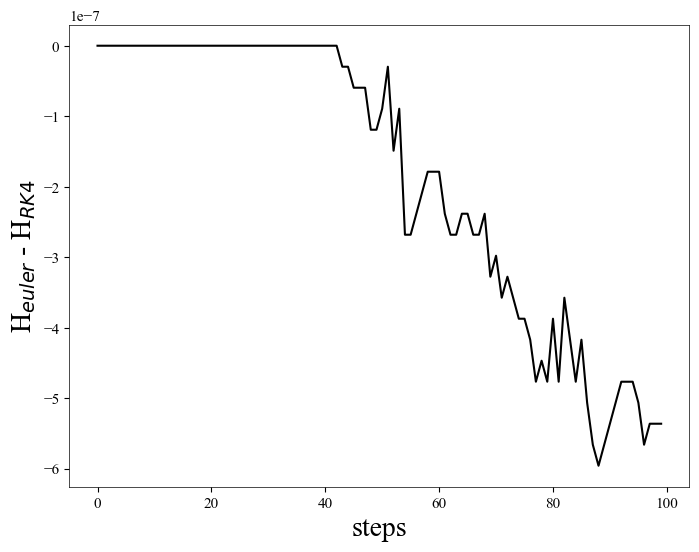

In [44]:
plt.plot((H_sho(ps_out_euler, omega=omega_correct) - H_sho(ps_out_rk4, omega=omega_correct)).detach())
plt.xlabel('steps', fontsize=20)
plt.ylabel('H$_{euler}$ - H$_{RK4}$', fontsize=20)

# H_err grid

In [38]:
from orbitflows.integrate import hamiltonian_fixed_angle

In [39]:
def h_error(model, ps):
    '''
    Compute the error of the model prediction in the Hamiltonian.
    
    Parameters
    ----------
    ps : torch.tensor
        phase-space point
    
    Returns
    -------
    torch.tensor
        Hamiltonian error of the model prediction
    '''
    _aa = model.ps_to_aa(ps)
    return H(ps, model.targetPotential) - hamiltonian_fixed_angle(model, _aa)

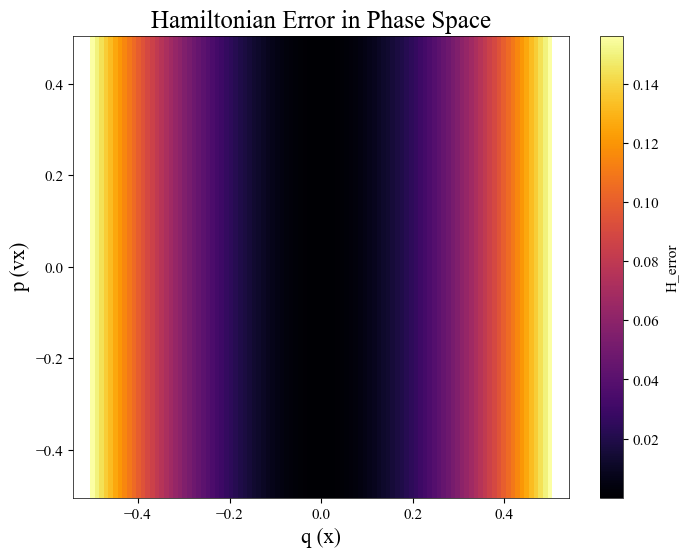

In [40]:
# Determine the range for q (x) and p (vx) from training data
x_min, x_max = ps_guess[..., 0].min().item(), ps_guess[..., 0].max().item()
vx_min, vx_max = ps_guess[..., 1].min().item(), ps_guess[..., 1].max().item()

# Create a grid of points in phase space
n_grid_points = 100 # Number of points for each dimension in the grid
x_grid = torch.linspace(x_min, x_max, n_grid_points)
vx_grid = torch.linspace(vx_min, vx_max, n_grid_points)
X, VX = torch.meshgrid(x_grid, vx_grid, indexing='xy')

# Prepare phase-space points for h_error function
# Shape: (n_grid_points*n_grid_points, 2)
ps_grid = torch.stack([X.flatten(), VX.flatten()], dim=1)

# Calculate h_error for each point in the grid
# Ensure ps_grid is on the same device as model parameters if using GPU
# For this example, assuming CPU
error_values = torch.zeros(ps_grid.shape[0])
# Batch processing if memory is an issue, but for 100x100 it should be fine
with torch.no_grad(): # No need to track gradients for plotting
    error_values = h_error(model, ps_grid)

# Reshape error_values to the grid shape
error_grid = error_values.reshape(n_grid_points, n_grid_points)

# Plot the colormap
plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(X.numpy(), VX.numpy(), error_grid.numpy(), cmap='inferno', shading='auto')
plt.colorbar(pcm, label='H_error')
plt.xlabel('q (x)', fontsize=15)
plt.ylabel('p (vx)', fontsize=15)
plt.title('Hamiltonian Error in Phase Space', fontsize=18)
plt.axis('equal') # Keep aspect ratio for phase space
plt.show()

In [41]:
import seaborn as sns

# Determine the range for q (x) and p (vx) from training data
x_min, x_max = ps_guess[..., 0].min().item(), ps_guess[..., 0].max().item()
vx_min, vx_max = ps_guess[..., 1].min().item(), ps_guess[..., 1].max().item()

# Create a grid of points in phase space
n_grid_points = 100 # Number of points for each dimension in the grid
x_grid = torch.linspace(x_min, x_max, n_grid_points)
vx_grid = torch.linspace(vx_min, vx_max, n_grid_points)
X, VX = torch.meshgrid(x_grid, vx_grid, indexing='xy')

# Prepare phase-space points for h_error function
# Shape: (n_grid_points*n_grid_points, 2)
ps_grid = torch.stack([X.flatten(), VX.flatten()], dim=1)

# Calculate h_error for each point in the grid
# Ensure ps_grid is on the same device as model parameters if using GPU
# For this example, assuming CPU
error_values = torch.zeros(ps_grid.shape[0])
# Batch processing if memory is an issue, but for 100x100 it should be fine
with torch.no_grad(): # No need to track gradients for plotting
    error_values = h_error(model, ps_grid)

# Reshape error_values to the grid shape
error_grid = error_values.reshape(n_grid_points, n_grid_points)

# Plot the colormap using seaborn
plt.figure(figsize=(8, 6))
# It's common to flip the error_grid vertically for heatmap if y-axis is ascending
# and meshgrid indexing was 'xy'
ax = sns.heatmap(error_grid.numpy(), cmap='inferno', 
                 xticklabels=n_grid_points//10, yticklabels=n_grid_points//10, 
                 cbar_kws={'label': 'H_error'})

# Set tick labels to correspond to the actual grid values
# Show every 10th tick label for clarity
tick_skip = 10
ax.set_xticks(np.arange(0, n_grid_points, tick_skip))
ax.set_xticklabels([f"{val:.2f}" for val in x_grid[::tick_skip].numpy()], rotation=45, ha="right")
ax.set_yticks(np.arange(0, n_grid_points, tick_skip))
# For heatmap, y-axis is often inverted by default, so we might need to adjust or flip vx_grid labels
ax.set_yticklabels([f"{val:.2f}" for val in vx_grid[::tick_skip].numpy()][::-1], rotation=0)


plt.xlabel('q (x)', fontsize=15)
plt.ylabel('p (vx)', fontsize=15)
plt.title('Hamiltonian Error in Phase Space (Seaborn)', fontsize=18)
# plt.axis('equal') # Seaborn heatmap handles aspect differently, usually not set to 'equal' unless square data
plt.show()

ModuleNotFoundError: No module named 'seaborn'